#Loan Eligibility Prediction


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('/content/loan-train.csv')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# goal = To build a ML model that will predict whether a person is eligible for Loan

In [6]:
#cloning data
df = data.copy()


In [7]:
#columns present in data set-
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
#info about data
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.shape
#counting the rows and columns of the dataset

(614, 13)

In [10]:
#checking missing Values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#EDA

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


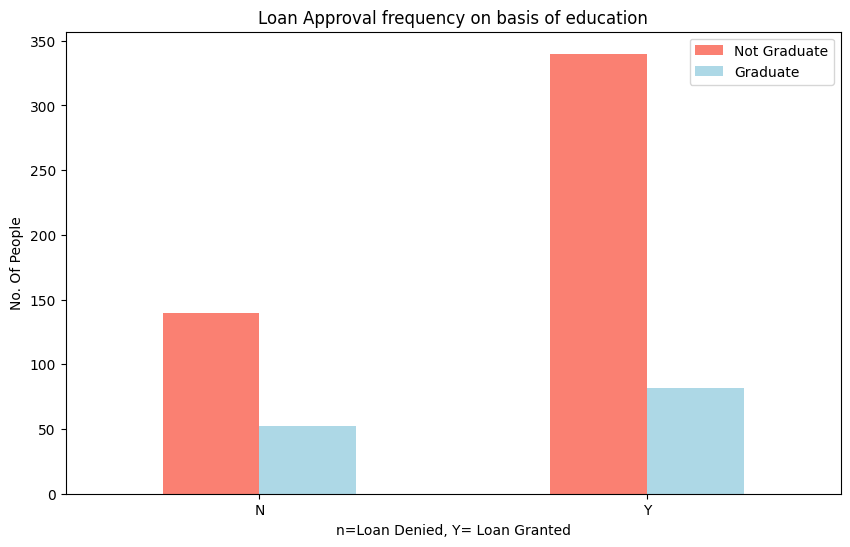

In [12]:
#crosstab of education vs loan_status
pd.crosstab(df.Loan_Status,df.Education).plot(kind = 'bar',figsize = (10,6),color = ['salmon','lightblue'])
plt.title("Loan Approval frequency on basis of education")
plt.xlabel("n=Loan Denied, Y= Loan Granted")
plt.ylabel("No. Of People")
plt.xticks(rotation=0);
plt.legend(["Not Graduate","Graduate"]);

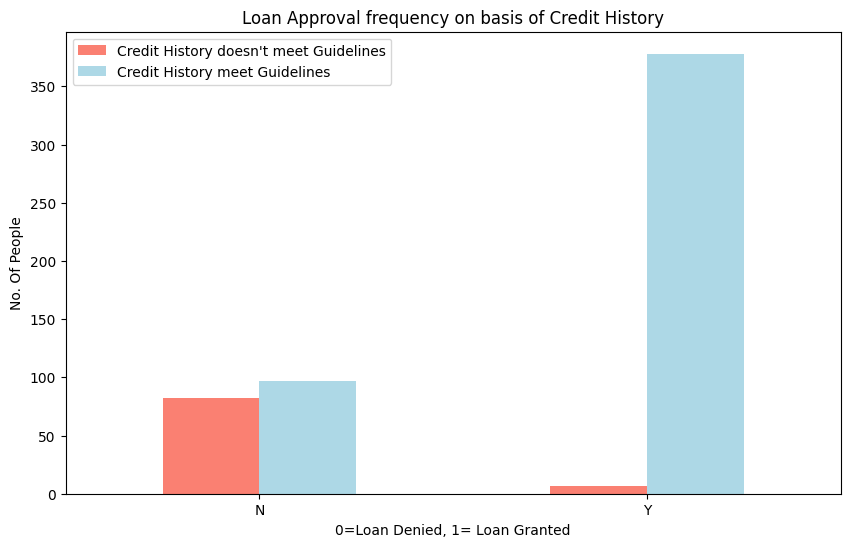

In [13]:
#crosstab of credit vs loan status
pd.crosstab(df.Loan_Status,df.Credit_History).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Loan Approval frequency on basis of Credit History")
plt.xlabel("0=Loan Denied, 1= Loan Granted")
plt.ylabel("No. Of People")
plt.xticks(rotation=0);
plt.legend(["Credit History doesn't meet Guidelines","Credit History meet Guidelines"]);


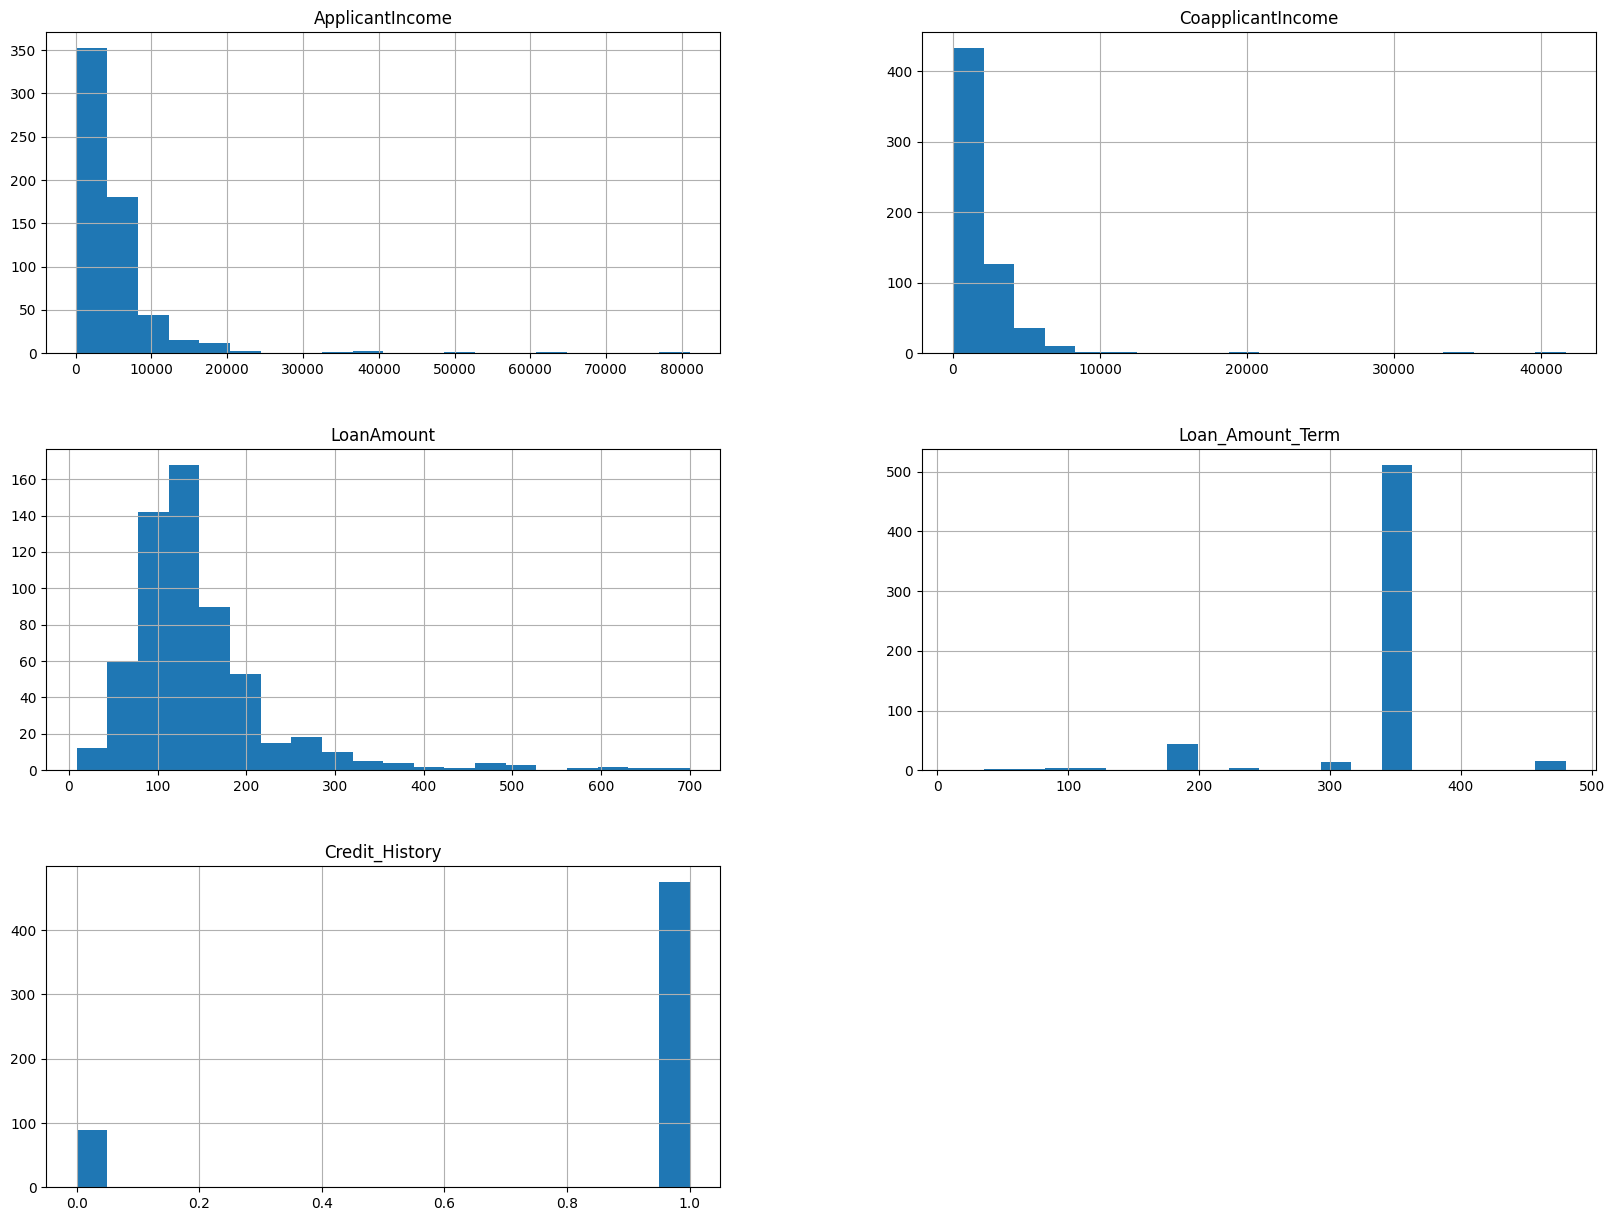

In [14]:
df.drop("Loan_ID",axis=1).hist(bins=20,figsize=(20,15));

In [15]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#Label Encoding

In [16]:
df.replace({'Married': {'No':0, 'Yes':1}, 'Gender': {'Male':1, 'Female':0},
                                 'Self_Employed': {'No': 0, 'Yes':1} , 'Property_Area': {'Rural':0 , 'Semiurban':1, 'Urban': 3}
                                 , 'Education': {'Graduate':1, 'Not Graduate':0}, 'Loan_Status': {'N':0,'Y':1}}, inplace = True)

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,3,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,3,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,3,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,3,1


In [18]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [19]:
df.replace(to_replace = '3+' , value = 4, inplace =True)
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1.0,1.0,4,1,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,3,1
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,3,1
613,LP002990,0.0,0.0,0,1,1.0,4583,0.0,133.0,360.0,0.0,1,0


In [20]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
#Replacing null values in loan amount
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,3,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,3,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,3,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,3,1


In [22]:
# replacing null values in loan amount term
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,3,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,3,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,3,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1.0,1.0,4,1,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.000000,360.0,1.0,3,1
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.000000,360.0,1.0,3,1


In [23]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,3,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,3,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,3,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1.0,1.0,4,1,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.000000,360.0,1.0,3,1
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.000000,360.0,1.0,3,1


In [24]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
#no null values

#Data Visualization

<Axes: xlabel='Married', ylabel='count'>

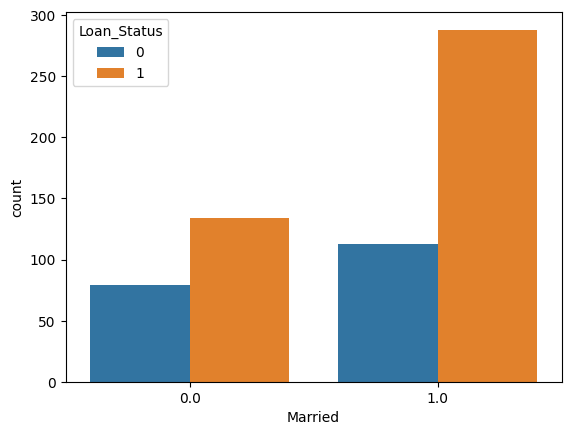

In [26]:
sns.countplot(data = df,x = 'Married',hue = 'Loan_Status')

<Axes: xlabel='Education', ylabel='count'>

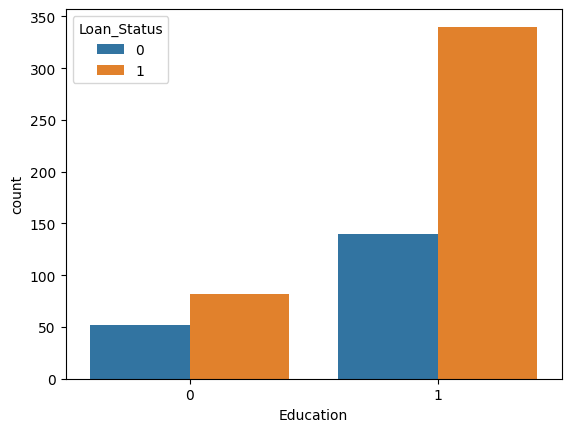

In [27]:
sns.countplot(data = df,x = 'Education',hue = 'Loan_Status')

<Axes: xlabel='Gender', ylabel='count'>

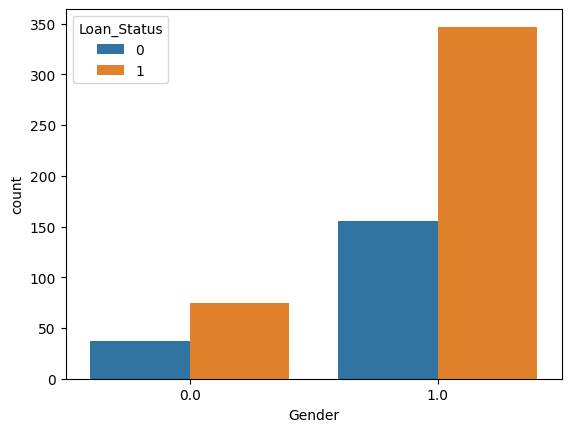

In [28]:
sns.countplot(data = df,x = 'Gender',hue = 'Loan_Status')

<Axes: xlabel='Dependents', ylabel='count'>

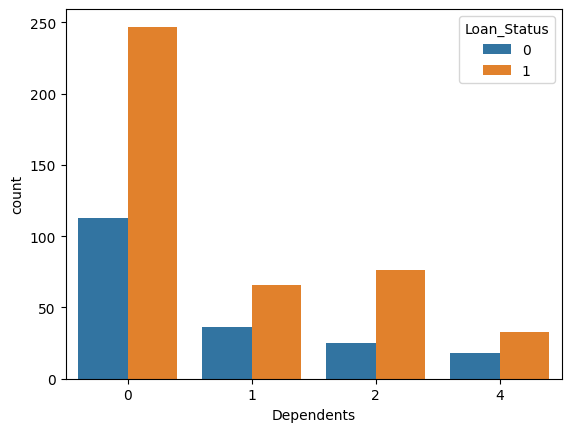

In [29]:
sns.countplot(data = df,x = 'Dependents',hue = 'Loan_Status')

<Axes: xlabel='Self_Employed', ylabel='count'>

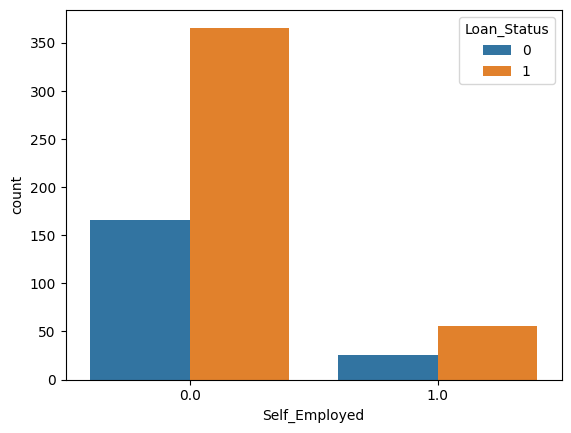

In [30]:
sns.countplot(data = df,x = 'Self_Employed',hue = 'Loan_Status')

<Axes: xlabel='Credit_History', ylabel='count'>

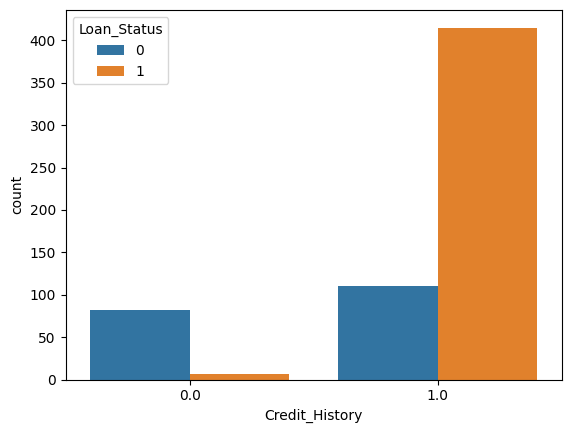

In [31]:
sns.countplot(data = df,x = 'Credit_History',hue = 'Loan_Status')

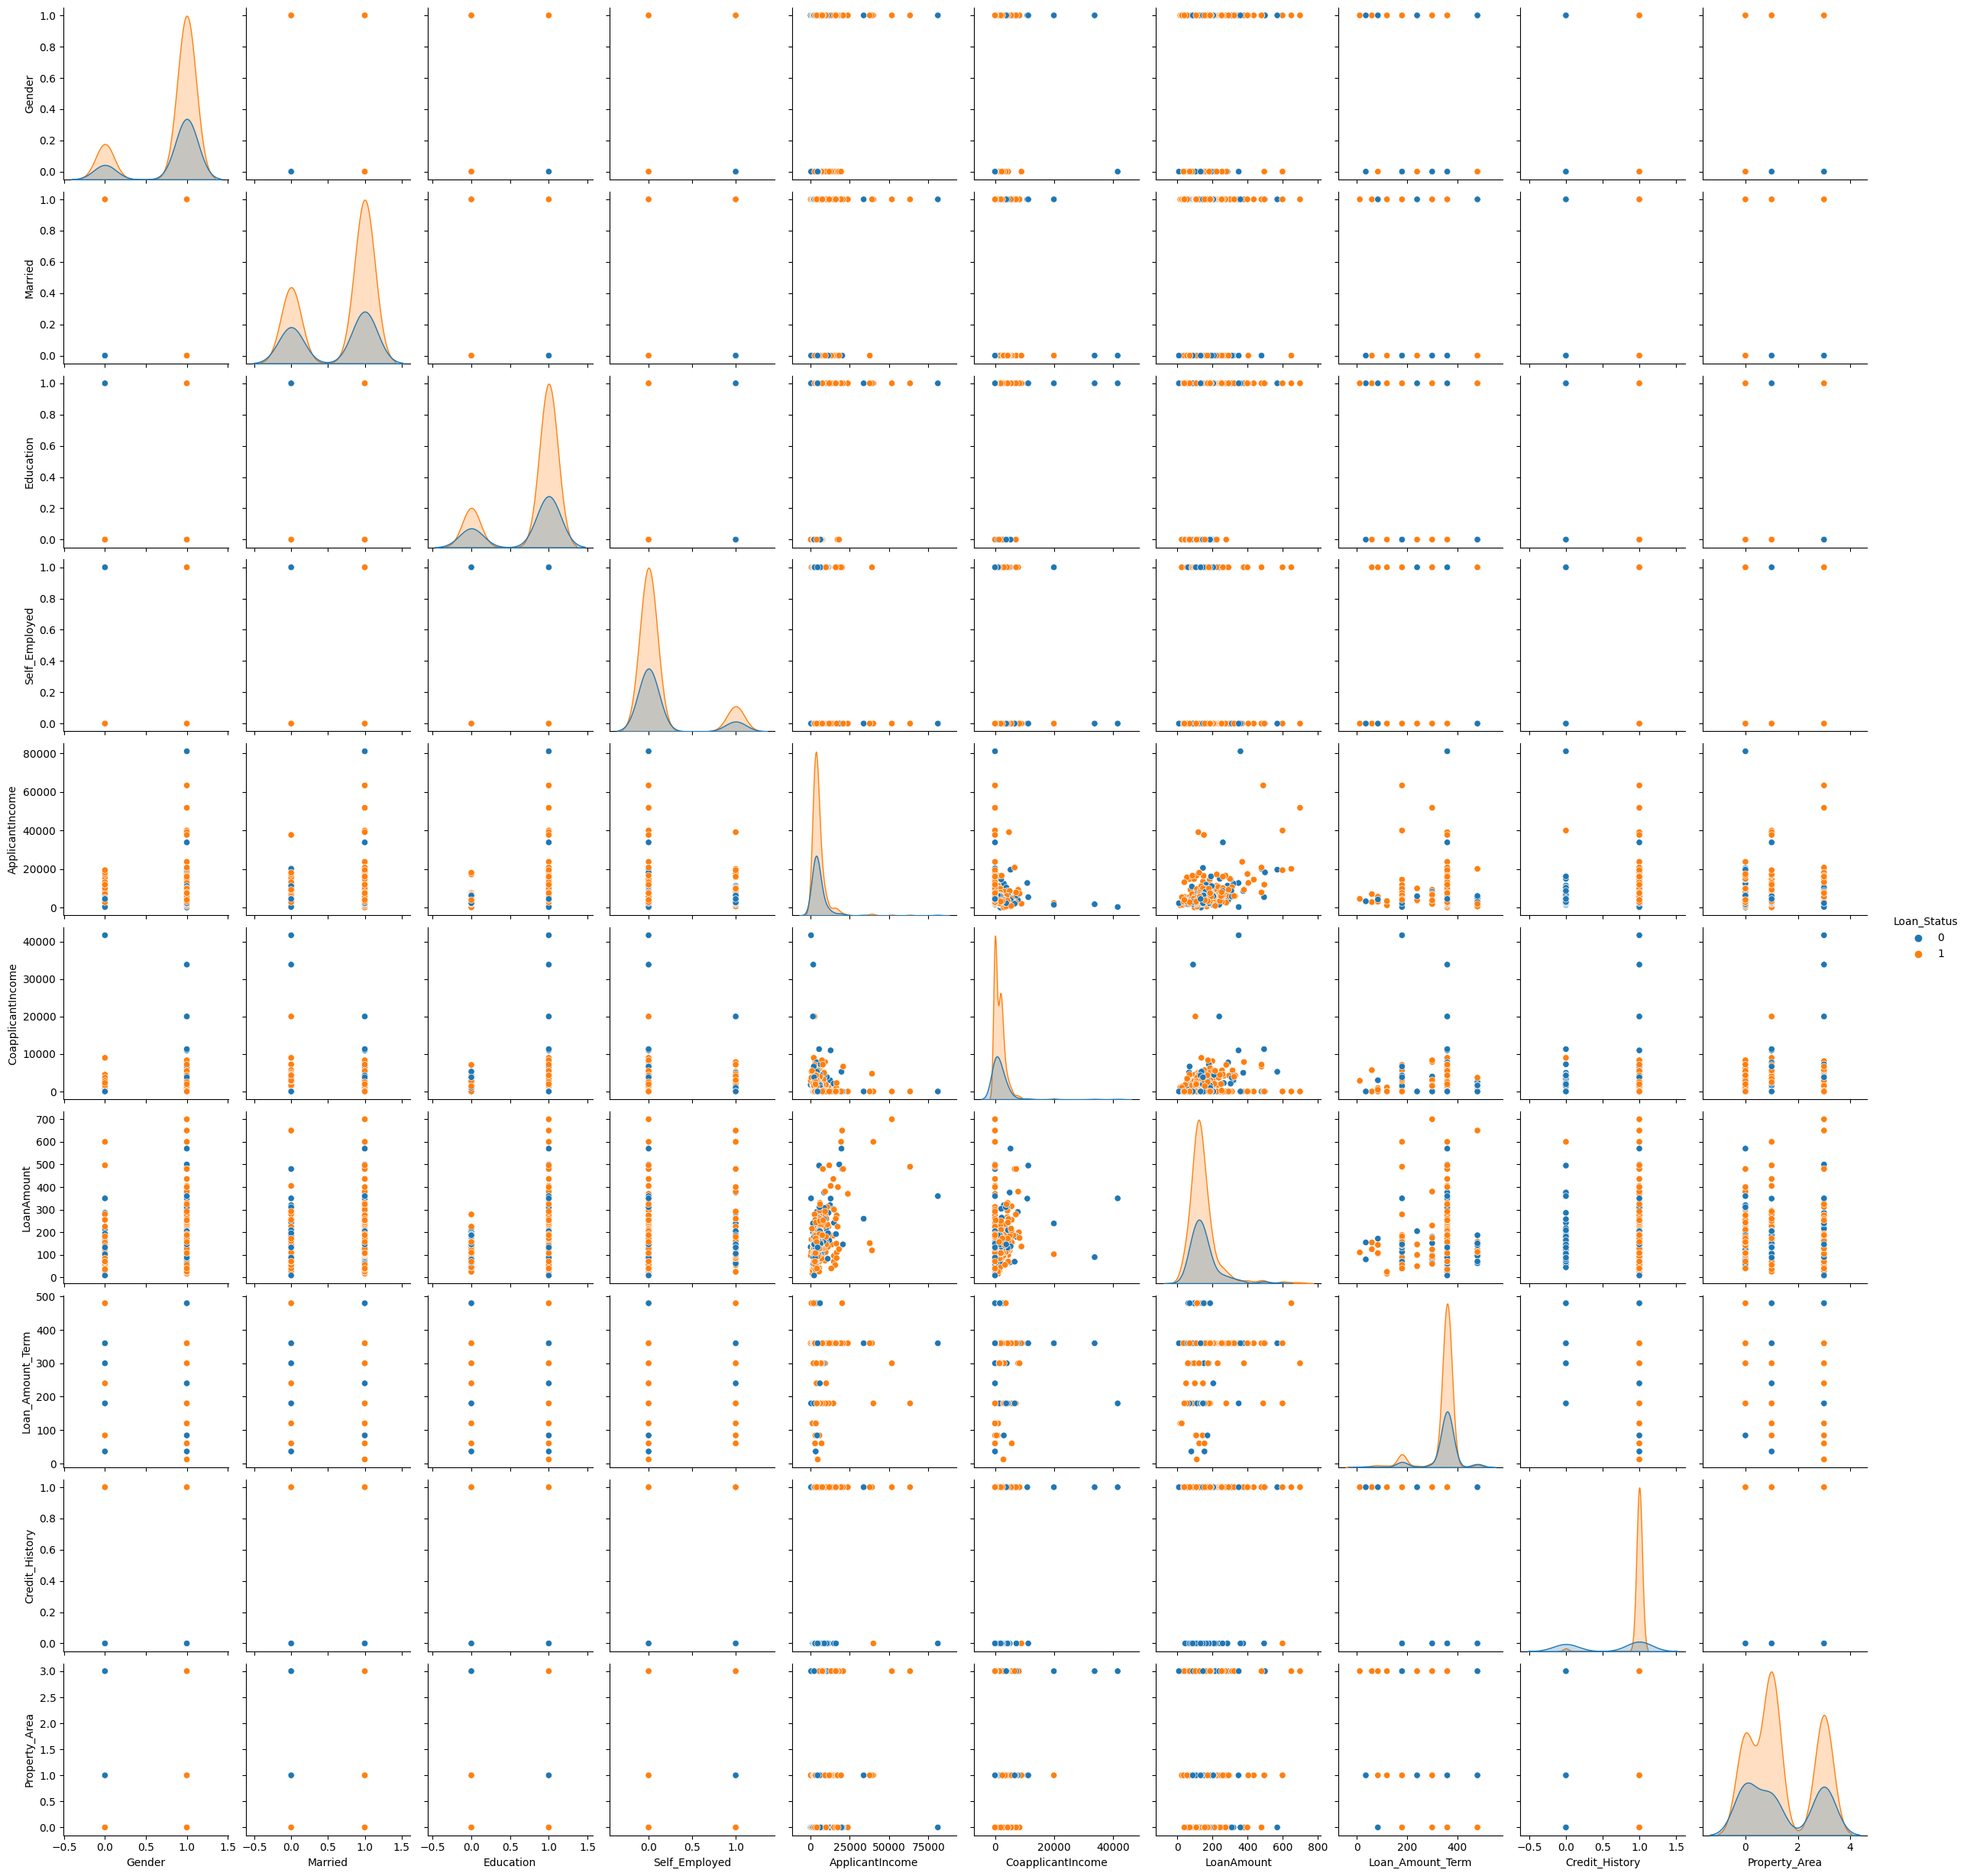

In [32]:
sns.pairplot(df,hue='Loan_Status')

In [33]:
X = df.drop(columns = ['Loan_ID','Loan_Status'],axis = 1)
y = df['Loan_Status']

In [34]:
#spliting the data set
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state=2,stratify=y)

In [36]:
#SVM Model

from sklearn.svm import SVC

In [37]:
svm_model = SVC(kernel = 'linear')

In [38]:
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [39]:
#checking accuracy
svm_pred = svm_model.predict(X_test)

In [40]:
from sklearn.metrics import classification_report,accuracy_score

In [41]:

svm_report = classification_report(y_test,svm_pred)
print(svm_report)
svm_accuracy =accuracy_score(y_test,svm_pred)
print('SVM accuracy is : ',svm_accuracy*100 )

              precision    recall  f1-score   support

           0       0.86      0.47      0.61        38
           1       0.80      0.96      0.88        85

    accuracy                           0.81       123
   macro avg       0.83      0.72      0.74       123
weighted avg       0.82      0.81      0.79       123

SVM accuracy is :  81.30081300813008


#KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [44]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:
knn_pred = knn_model.predict(X_test)

In [46]:
knn_report = classification_report(y_test,knn_pred)

In [47]:
print(knn_report)
print(accuracy_score(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.32      0.26      0.29        38
           1       0.70      0.75      0.72        85

    accuracy                           0.60       123
   macro avg       0.51      0.51      0.51       123
weighted avg       0.58      0.60      0.59       123

0.6016260162601627


As we can see from accuracy score that SVM classifier is a better model with higher accuracy and so we will use it to make a predictive system

In [48]:
import numpy as np
# predictive system
input = (1.0,0.0,0,1,0,5849,0.0,146.412162,360.0,1.0,3)

# converting input to a numpy array
input_as_numpy_array = np.asarray(input)

#reshaping array as it is only one instance
reshaped_array = input_as_numpy_array.reshape(1,-1)

#prediction
predicted_values = svm_model.predict(reshaped_array)

print(predicted_values)

if (predicted_values==1):
    print("Loan approved")

else:
    print("Loan rejected")

[1]
Loan approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [49]:
import pickle

with open('loan_approval_model.sav', 'wb') as model_file:
    pickle.dump(svm_model, model_file)

print("Model saved to loan_approval_model.sav")


Model saved to loan_approval_model.sav


In [50]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [51]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')